# Tutorial 14 - Neural Network

In [1]:
%matplotlib inline

In [2]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

In [3]:
df = pd.read_csv('assignment3.txt')

In [4]:
df

,Elements,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,Density,Crystal System
0,H,1,2.20,0.25,0.1805,0.09,HEX
1,He,2,0.00,1.20,0.1513,0.18,HCP
2,Li,3,0.98,1.45,85.0000,530.00,BCC
3,Be,4,1.57,1.05,190.0000,1850.00,HCP
4,B,5,2.04,0.85,27.0000,2340.00,RHO
...,...,...,...,...,...,...,...
90,U,92,1.38,1.75,27.0000,18950.00,ORTH
91,Np,93,1.36,1.75,6.0000,20200.00,ORTH
92,Pu,94,1.28,1.75,6.0000,19840.00,MON
93,Am,95,1.30,1.75,10.0000,13670.00,HCP


In [5]:
df.head(10)

,Elements,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,Density,Crystal System
0,H,1,2.20,0.25,0.18050,0.09,HEX
1,He,2,0.00,1.20,0.15130,0.18,HCP
2,Li,3,0.98,1.45,85.00000,530.00,BCC
3,Be,4,1.57,1.05,190.00000,1850.00,HCP
4,B,5,2.04,0.85,27.00000,2340.00,RHO
5,C,6,2.55,0.70,140.00000,2260.00,HEX
6,N,7,3.04,0.65,0.02583,1.25,HEX
7,O,8,3.44,0.60,0.02658,1.43,SC
8,F,9,3.98,0.50,0.02770,1.70,SC
9,Ne,10,0.00,1.60,0.04910,0.90,FCC


In [7]:
del df['Crystal System']
del df['Elements']

In [8]:
df.head(10)

,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,Density
0,1,2.20,0.25,0.18050,0.09
1,2,0.00,1.20,0.15130,0.18
2,3,0.98,1.45,85.00000,530.00
3,4,1.57,1.05,190.00000,1850.00
4,5,2.04,0.85,27.00000,2340.00
5,6,2.55,0.70,140.00000,2260.00
6,7,3.04,0.65,0.02583,1.25
7,8,3.44,0.60,0.02658,1.43
8,9,3.98,0.50,0.02770,1.70
9,10,0.00,1.60,0.04910,0.90


In [9]:
# get a list of the columns
col_list = list(df)
#swap columns
col_list[0], col_list[1], col_list[2], col_list[3],col_list[4]=col_list[0], col_list[1], col_list[2], col_list[4],col_list[3]
# assign back, the order will now be swapped
df.columns = col_list

In [10]:
df.head(10)

,Atomic Number,Electronegativity,Atomic Radius,Density,Thermal Conductivity
0,1,2.20,0.25,0.18050,0.09
1,2,0.00,1.20,0.15130,0.18
2,3,0.98,1.45,85.00000,530.00
3,4,1.57,1.05,190.00000,1850.00
4,5,2.04,0.85,27.00000,2340.00
5,6,2.55,0.70,140.00000,2260.00
6,7,3.04,0.65,0.02583,1.25
7,8,3.44,0.60,0.02658,1.43
8,9,3.98,0.50,0.02770,1.70
9,10,0.00,1.60,0.04910,0.90


In [11]:
dataset = df.values

In [12]:
dataset

array([[1.000e+00, 2.200e+00, 2.500e-01, 1.805e-01, 9.000e-02],
       [2.000e+00, 0.000e+00, 1.200e+00, 1.513e-01, 1.800e-01],
       [3.000e+00, 9.800e-01, 1.450e+00, 8.500e+01, 5.300e+02],
       [4.000e+00, 1.570e+00, 1.050e+00, 1.900e+02, 1.850e+03],
       [5.000e+00, 2.040e+00, 8.500e-01, 2.700e+01, 2.340e+03],
       [6.000e+00, 2.550e+00, 7.000e-01, 1.400e+02, 2.260e+03],
       [7.000e+00, 3.040e+00, 6.500e-01, 2.583e-02, 1.250e+00],
       [8.000e+00, 3.440e+00, 6.000e-01, 2.658e-02, 1.430e+00],
       [9.000e+00, 3.980e+00, 5.000e-01, 2.770e-02, 1.700e+00],
       [1.000e+01, 0.000e+00, 1.600e+00, 4.910e-02, 9.000e-01],
       [1.100e+01, 9.300e-01, 1.800e+00, 1.400e+02, 9.700e+02],
       [1.200e+01, 1.310e+00, 1.500e+00, 1.600e+02, 1.740e+03],
       [1.300e+01, 1.610e+00, 1.250e+00, 2.350e+02, 2.700e+03],
       [1.400e+01, 1.900e+00, 1.100e+00, 1.500e+02, 2.330e+03],
       [1.500e+01, 2.190e+00, 1.000e+00, 2.360e-01, 1.820e+03],
       [1.600e+01, 2.580e+00, 1.000e+00,

In [13]:
len(dataset)

95

In [14]:
X = dataset[:,0:4]

In [15]:
X

array([[1.000e+00, 2.200e+00, 2.500e-01, 1.805e-01],
       [2.000e+00, 0.000e+00, 1.200e+00, 1.513e-01],
       [3.000e+00, 9.800e-01, 1.450e+00, 8.500e+01],
       [4.000e+00, 1.570e+00, 1.050e+00, 1.900e+02],
       [5.000e+00, 2.040e+00, 8.500e-01, 2.700e+01],
       [6.000e+00, 2.550e+00, 7.000e-01, 1.400e+02],
       [7.000e+00, 3.040e+00, 6.500e-01, 2.583e-02],
       [8.000e+00, 3.440e+00, 6.000e-01, 2.658e-02],
       [9.000e+00, 3.980e+00, 5.000e-01, 2.770e-02],
       [1.000e+01, 0.000e+00, 1.600e+00, 4.910e-02],
       [1.100e+01, 9.300e-01, 1.800e+00, 1.400e+02],
       [1.200e+01, 1.310e+00, 1.500e+00, 1.600e+02],
       [1.300e+01, 1.610e+00, 1.250e+00, 2.350e+02],
       [1.400e+01, 1.900e+00, 1.100e+00, 1.500e+02],
       [1.500e+01, 2.190e+00, 1.000e+00, 2.360e-01],
       [1.600e+01, 2.580e+00, 1.000e+00, 2.050e-01],
       [1.700e+01, 3.160e+00, 1.000e+00, 8.900e-03],
       [1.800e+01, 0.000e+00, 7.100e-01, 1.772e-02],
       [1.900e+01, 8.200e-01, 2.200e+00, 1.000

In [16]:
Y = dataset[:,4]

In [17]:
Y

array([9.000e-02, 1.800e-01, 5.300e+02, 1.850e+03, 2.340e+03, 2.260e+03,
       1.250e+00, 1.430e+00, 1.700e+00, 9.000e-01, 9.700e+02, 1.740e+03,
       2.700e+03, 2.330e+03, 1.820e+03, 2.070e+03, 3.210e+00, 1.780e+00,
       8.600e+02, 1.550e+03, 2.990e+03, 4.540e+03, 6.110e+03, 7.190e+03,
       7.430e+03, 7.870e+03, 8.900e+03, 8.900e+03, 8.960e+03, 7.130e+03,
       5.910e+03, 5.320e+03, 5.720e+03, 4.790e+03, 3.120e+03, 3.750e+00,
       1.630e+03, 2.540e+03, 4.470e+03, 6.510e+03, 8.570e+03, 1.022e+04,
       1.150e+04, 1.237e+04, 1.241e+04, 1.202e+04, 1.050e+04, 8.650e+03,
       7.310e+03, 7.310e+03, 6.680e+03, 6.240e+03, 4.930e+03, 5.900e+00,
       1.870e+03, 3.590e+03, 6.150e+03, 6.770e+03, 6.770e+03, 7.010e+03,
       7.300e+03, 7.520e+03, 5.240e+03, 7.900e+03, 8.230e+03, 8.550e+03,
       8.800e+03, 9.070e+03, 9.320e+03, 6.900e+03, 9.840e+03, 1.331e+04,
       1.665e+04, 1.935e+04, 2.104e+04, 2.260e+04, 2.240e+04, 2.145e+04,
       1.932e+04, 1.355e+04, 1.185e+04, 1.135e+04, 

In [18]:
from sklearn import preprocessing

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [20]:
X_scale

array([[0.00000000e+00, 5.52763819e-01, 0.00000000e+00, 4.11375547e-04],
       [1.05263158e-02, 0.00000000e+00, 4.04255319e-01, 3.43468000e-04],
       [2.10526316e-02, 2.46231156e-01, 5.10638298e-01, 1.97667683e-01],
       [3.15789474e-02, 3.94472362e-01, 3.40425532e-01, 4.41855779e-01],
       [4.21052632e-02, 5.12562814e-01, 2.55319149e-01, 6.27828294e-02],
       [5.26315789e-02, 6.40703518e-01, 1.91489362e-01, 3.25575733e-01],
       [6.31578947e-02, 7.63819095e-01, 1.70212766e-01, 5.16748524e-05],
       [7.36842105e-02, 8.64321608e-01, 1.48936170e-01, 5.34190531e-05],
       [8.42105263e-02, 1.00000000e+00, 1.06382979e-01, 5.60237262e-05],
       [9.47368421e-02, 0.00000000e+00, 5.74468085e-01, 1.05791586e-04],
       [1.05263158e-01, 2.33668342e-01, 6.59574468e-01, 3.25575733e-01],
       [1.15789474e-01, 3.29145729e-01, 5.31914894e-01, 3.72087752e-01],
       [1.26315789e-01, 4.04522613e-01, 4.25531915e-01, 5.46507821e-01],
       [1.36842105e-01, 4.77386935e-01, 3.61702128e

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [23]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [24]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(66, 4) (14, 4) (15, 4) (66,) (14,) (15,)


In [ ]:
conda install tensorflow

In [25]:
from tensorflow.keras.models import Sequential
#from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Activation, LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [211]:
model = Sequential([Dense(4, activation='relu', input_shape=(4,)),Dense(4, activation='relu'),Dense(1, activation='sigmoid'),])

In [212]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [213]:
hist = model.fit(X_train, Y_train,batch_size=15, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
4/4 [==============================] - 0s 33ms/step - loss: -5.6506 - accuracy: 0.0000e+00 - val_loss: -6.3563 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: -5.9056 - accuracy: 0.0000e+00 - val_loss: -6.6394 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: -6.1886 - accuracy: 0.0000e+00 - val_loss: -6.9189 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: -6.4434 - accuracy: 0.0000e+00 - val_loss: -7.2094 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: -6.7027 - accuracy: 0.0000e+00 - val_loss: -7.5030 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: -7.0046 - accuracy: 0.0000e+00 - val_loss: -7.7962 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: -7.2741 - accuracy: 0.0000e+00 - val_los

In [204]:
model.evaluate(X_test, Y_test)[1]

1/1 [==============================] - 0s 1ms/step - loss: 0.9078 - accuracy: 0.0000e+00


0.0

In [205]:
import matplotlib.pyplot as plt

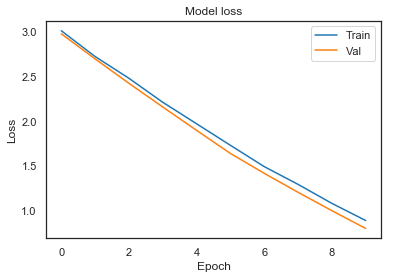

In [206]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [179]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

KeyError: 'acc'